# Speak Italian

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np

dataset_path = 'dataset'

## Data Analysis

### Dataset

Merge all .csv files to create the dataset. Each of them contains the landmarks that represent the gestures made by the same user

In [5]:
df = pd.DataFrame()

for file in os.listdir(dataset_path):
    if file.endswith('csv'):
        df_tmp = pd.read_csv(os.path.join(dataset_path, file), index_col=0)
        df = pd.concat([df, df_tmp], ignore_index=True)

df.rename(columns={'class': 'label'}, inplace=True)
dataset = df
dataset

WRIST_x   WRIST_y       WRIST_z  THUMB_CMC_x  THUMB_CMC_y  \
0      1.000000  0.872909 -1.968207e-07     0.875184     0.608718   
1      1.000000  0.878121 -1.881866e-07     0.862789     0.620340   
2      1.000000  0.858694 -2.192909e-07     0.862020     0.603069   
3      1.000000  0.842151 -2.070123e-07     0.846271     0.595327   
4      1.000000  0.849508 -2.065656e-07     0.847505     0.599720   
...         ...       ...           ...          ...          ...   
39995  0.401699  1.000000 -2.771128e-08     0.710313     0.920423   
39996  0.374251  1.000000 -1.663087e-08     0.703347     0.920178   
39997  0.403665  1.000000 -9.387191e-09     0.753026     0.913803   
39998  0.400077  1.000000 -7.245187e-08     0.752740     0.902205   
39999  0.389990  1.000000 -4.532185e-08     0.746763     0.909016   

       THUMB_CMC_z  THUMB_MCP_x  THUMB_MCP_y  THUMB_MCP_z  THUMBJP_x  ...  \
0        -0.002624     0.650712     0.369616    -0.014030   0.520465  ...   
1         0.000062     0.614220     0.382791    -0.008956   0.471805  ...   
2        -0.002035     0.637268     0.371481    -0.014257   0.486676  ...   
3         0.000033     0.611688     0.364969    -0.010301   0.459956  ...   
4        -0.002094     0.611284     0.372763    -0.013187   0.455480  ...   
...            ...          ...          ...          ...        ...  ...   
39995    -0.033200     0.954734     0.781188    -0.057146   0.934619  ...   
39996    -0.034101     0.957127     0.771741    -0.055623   0.925414  ...   
39997    -0.032238     1.000000     0.754059    -0.051992   0.983855  ...   
39998    -0.028264     1.000000     0.725537    -0.042997   0.977330  ...   
39999    -0.026744     1.000000     0.741567    -0.041701   0.991451  ...   

       PINKY_PIP_x  PINKY_PIP_y  PINKY_PIP_z  PINKY_DIP_x  PINKY_DIP_y  \
0         0.154488     0.986911    -0.058398     0.281356     1.000000   
1         0.150638     0.992691    -0.060480     0.277351     1.000000   
2         0.170557     0.987890    -0.065571     0.304748     1.000000   
3         0.174928     0.993973    -0.059177     0.309409     1.000000   
4         0.184911     0.990946    -0.056625     0.317406     1.000000   
...            ...          ...          ...          ...          ...   
39995     0.151733     0.637453    -0.104588     0.251374     0.737448   
39996     0.104510     0.584238    -0.100318     0.227861     0.692638   
39997     0.129535     0.571525    -0.101261     0.258695     0.677836   
39998     0.139008     0.547262    -0.085763     0.251428     0.655542   
39999     0.126446     0.551032    -0.086016     0.234232     0.656664   

       PINKY_DIP_z  PINKY_TIP_x  PINKY_TIP_y  PINKY_TIP_z          label  
0        -0.047085     0.417597     0.986051    -0.037384  thumbUp_right  
1        -0.049276     0.407005     0.983964    -0.039349  thumbUp_right  
2        -0.053247     0.435731     0.979856    -0.042585  thumbUp_right  
3        -0.047765     0.438565     0.976286    -0.037782  thumbUp_right  
4        -0.044772     0.442029     0.978218    -0.034590  thumbUp_right  
...            ...          ...          ...          ...            ...  
39995    -0.092755     0.281560     0.771730    -0.074507     index_left  
39996    -0.086534     0.280229     0.753619    -0.065363     index_left  
39997    -0.088185     0.290915     0.734115    -0.067713     index_left  
39998    -0.072409     0.248602     0.706568    -0.053124     index_left  
39999    -0.072924     0.242340     0.710600    -0.053883     index_left  

[40000 rows x 64 columns]

All attributes in the dataset are numerical

* 40.000 total instances
* 63 features per instance (21 points in 3D space)

Split the whole dataset in X (data instances) and y (labels)

In [6]:
X, y = dataset.loc[:, ~dataset.columns.isin(['label'])], dataset['label']
n_samples = X.shape[0]
n_features = dataset.shape[1]
labels = list(y.unique())

In [7]:
dataset.describe()

WRIST_x       WRIST_y       WRIST_z   THUMB_CMC_x   THUMB_CMC_y  \
count  40000.000000  40000.000000  4.000000e+04  40000.000000  40000.000000   
mean       0.492526      0.890649 -6.400215e-09      0.487814      0.768803   
std        0.382229      0.240747  5.354025e-07      0.295019      0.169908   
min        0.000000      0.000000 -1.237358e-06      0.000000      0.114005   
25%        0.114131      0.905145 -4.171551e-07      0.222519      0.637567   
50%        0.481098      1.000000 -1.557508e-07      0.495956      0.860823   
75%        0.911295      1.000000  4.483064e-07      0.758828      0.898791   
max        1.000000      1.000000  1.662309e-06      1.000000      1.000000   

        THUMB_CMC_z   THUMB_MCP_x   THUMB_MCP_y   THUMB_MCP_z     THUMBJP_x  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean      -0.016971      0.484699      0.600083     -0.029961      0.487129   
std        0.016787      0.314785      0.157886      0.021458      0.317281   
min       -0.081310      0.000000      0.000000     -0.131633      0.000000   
25%       -0.028121      0.201091      0.415474     -0.041689      0.184747   
50%       -0.017372      0.497523      0.657793     -0.028935      0.469382   
75%       -0.005722      0.751249      0.719031     -0.016561      0.807783   
max        0.080103      1.000000      1.000000      0.094243      1.000000   

       ...   PINKY_MCP_z   PINKY_PIP_x   PINKY_PIP_y   PINKY_PIP_z  \
count  ...  40000.000000  40000.000000  40000.000000  40000.000000   
mean   ...     -0.048028      0.497330      0.509488     -0.065459   
std    ...      0.028452      0.372863      0.328058      0.032431   
min    ...     -0.166516      0.000000      0.000000     -0.197845   
25%    ...     -0.064005      0.107623      0.287881     -0.088794   
50%    ...     -0.042850      0.499547      0.424600     -0.062537   
75%    ...     -0.027705      0.879460      0.908116     -0.043197   
max    ...      0.075918      1.000000      1.000000      0.106452   

        PINKY_DIP_x   PINKY_DIP_y   PINKY_DIP_z   PINKY_TIP_x   PINKY_TIP_y  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.495245      0.518078     -0.057358      0.496304      0.510872   
std        0.331004      0.333207      0.035021      0.330684      0.359381   
min        0.000000      0.000000     -0.202784      0.000000      0.000000   
25%        0.184551      0.239069     -0.082450      0.204642      0.154723   
50%        0.479552      0.442641     -0.054378      0.487103      0.513966   
75%        0.813459      0.898604     -0.032227      0.770630      0.890490   
max        1.000000      1.000000      0.137856      1.000000      1.000000   

        PINKY_TIP_z  
count  40000.000000  
mean      -0.046733  
std        0.038365  
min       -0.220696  
25%       -0.071441  
50%       -0.045794  
75%       -0.016683  
max        0.145454  

[8 rows x 63 columns]

### Class Frequency (Histogram)

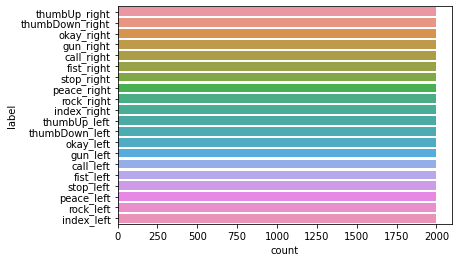

In [ ]:
import seaborn as sns

sns.countplot(data=dataset, y="label")
filename = 'countplot_'+str(len(labels))+'_classes.png'
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')

Dataset is perfectly banlanced:
* 10 Gestures
* 20 classes (for each gesture, 2 classes: one for right hand and one for left hand)
* 2000 instances for each class

### Data Visualization (Histogram)

Plot the histogram for each attribute to see the frequency of all possible values

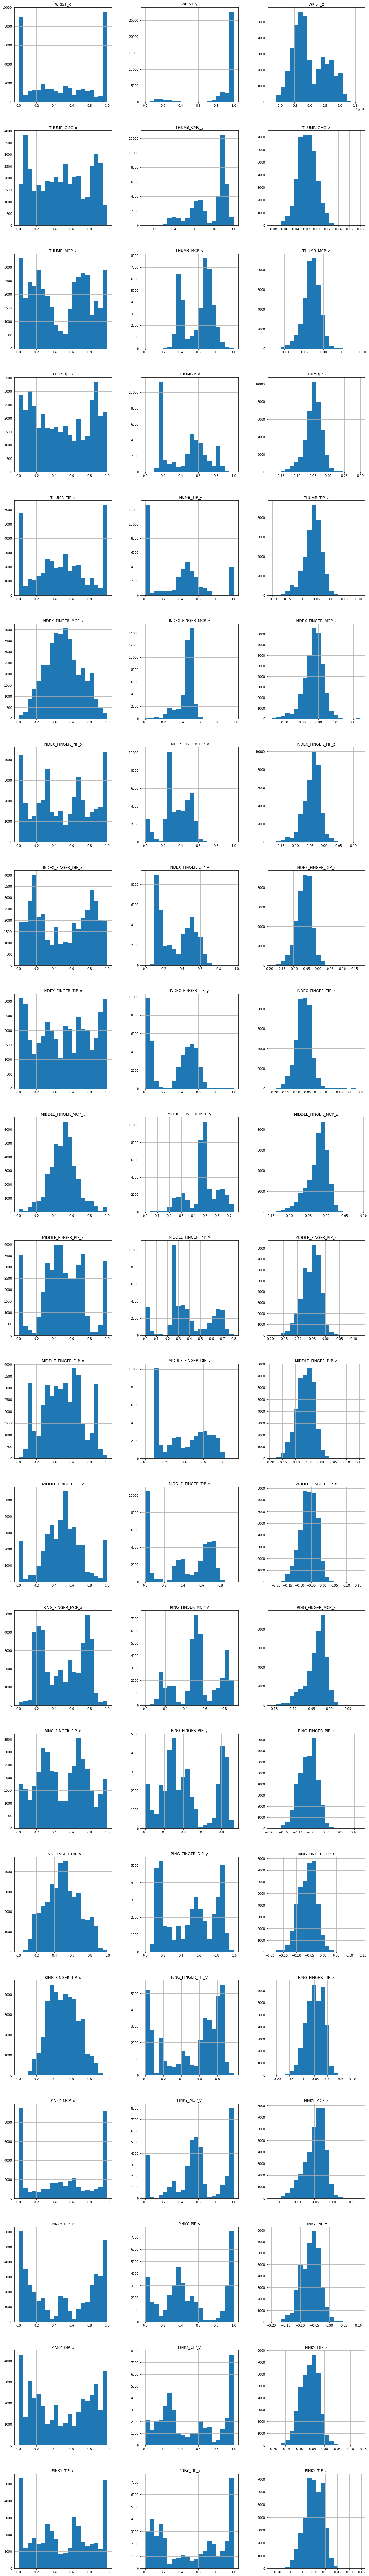

In [ ]:
X.hist(bins=20, figsize=(20,150), layout=(21,3));
filename = "histogram_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename)

Notice that all attributes that represent the z point of a landmark have similar behaviour among all gestures. Let's plot only those attributes to highlight this


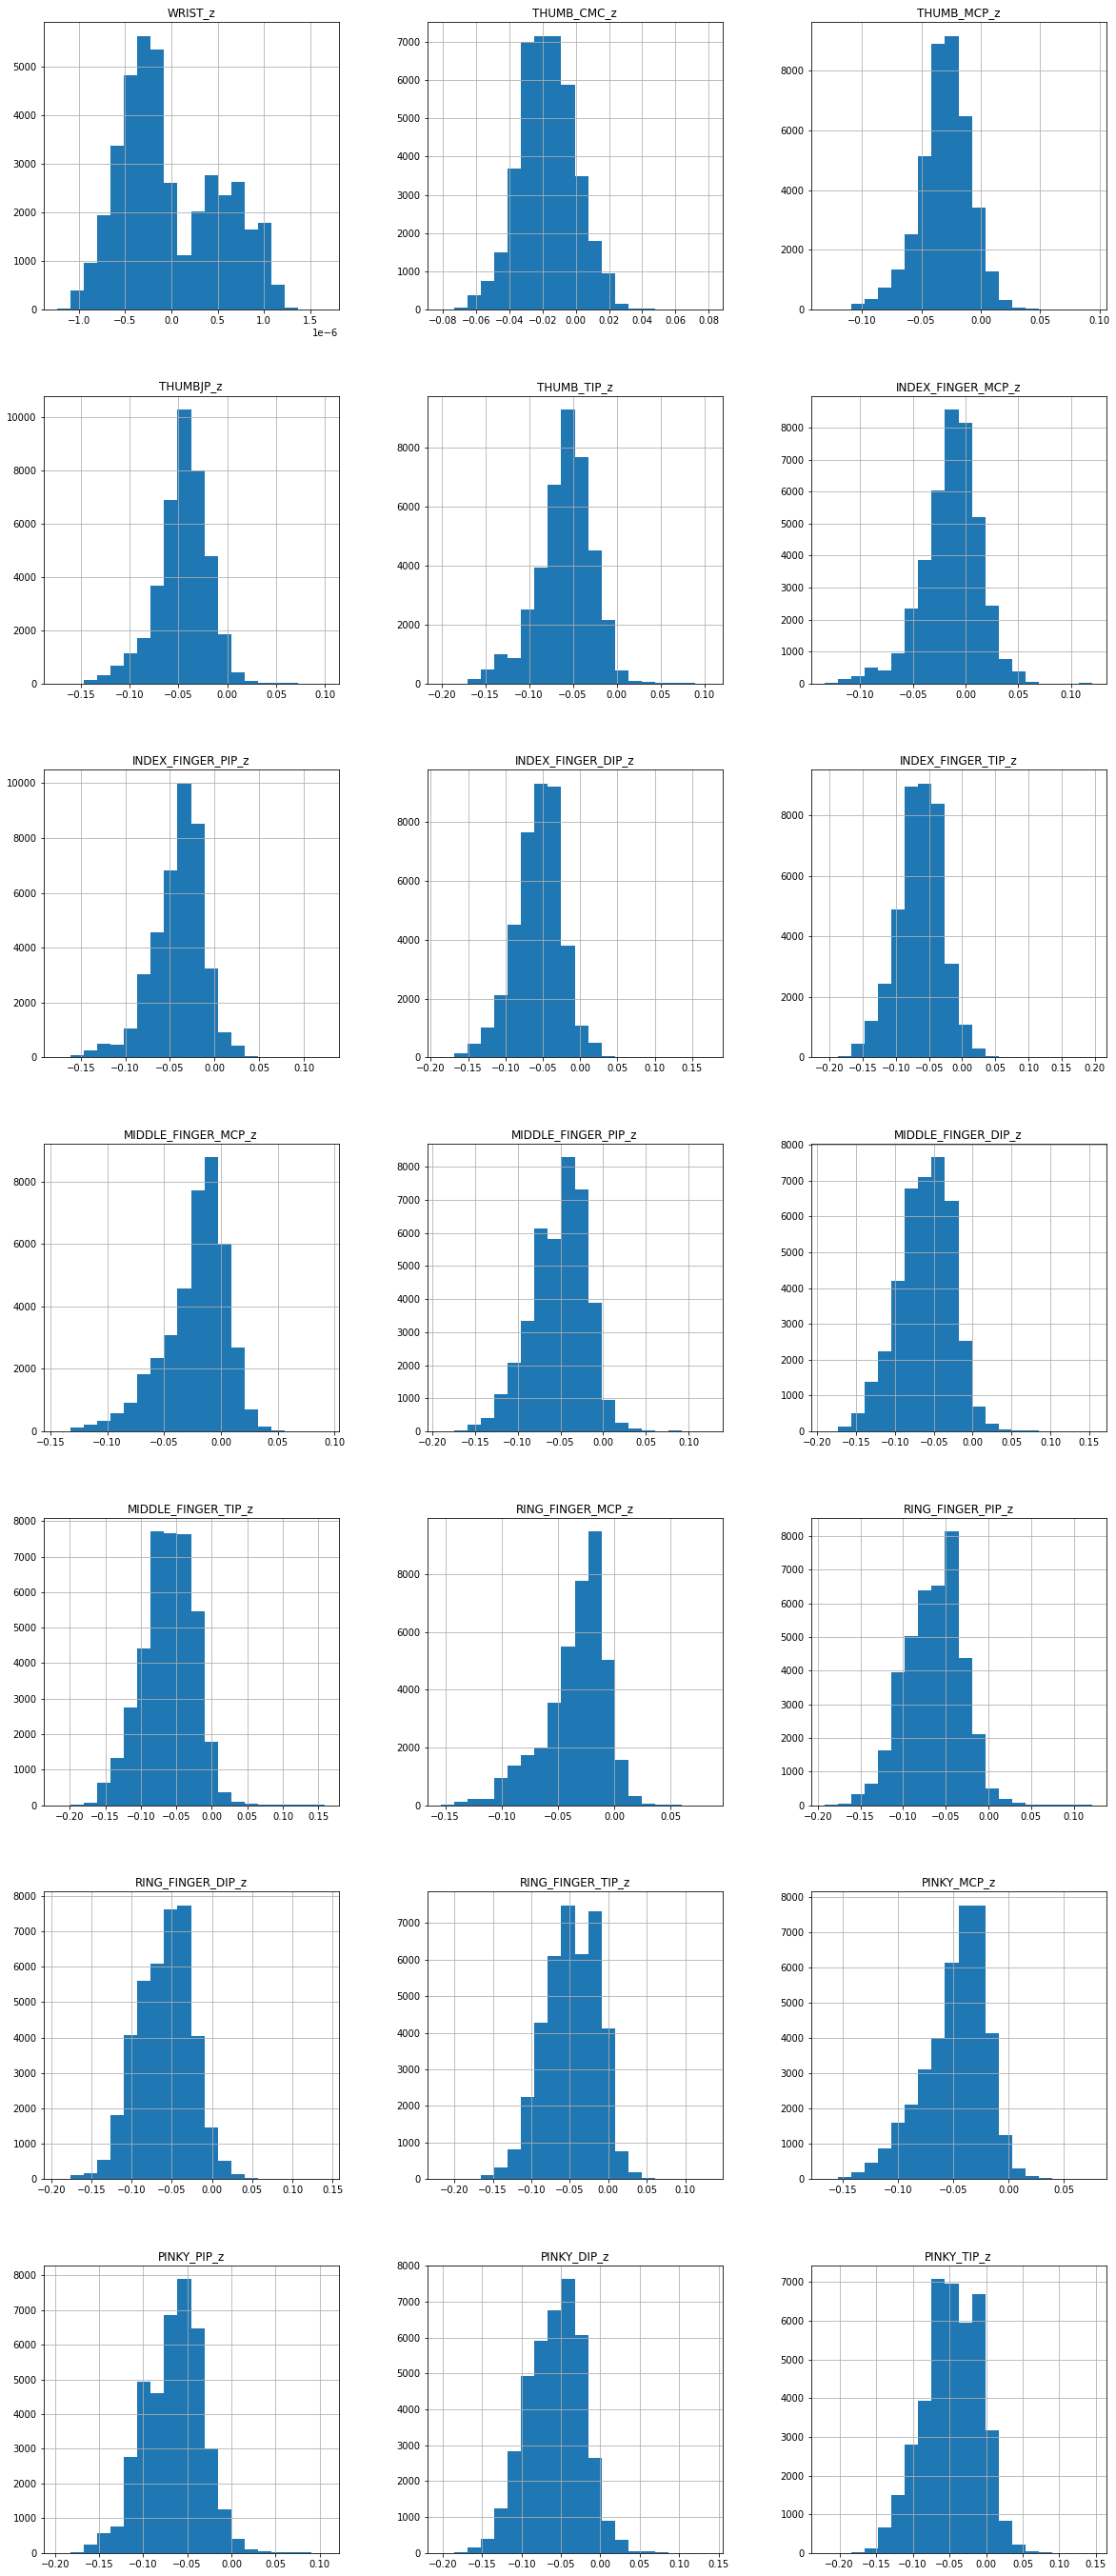

In [ ]:
X[[c for c in X.columns if c.endswith('z')]].hist(bins=20, figsize=(20,150), layout=(21,3));


filename = "z_histogram_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')

For all points the z-coordinate seems to follow the normal distribution. This suggests that they are less significant. Let's dimostrate this setting a low Variance Threshold.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

fsel = VarianceThreshold(threshold = 0.005)  # the attributes whose variance is greater than the threshold
fsel.fit_transform(X) # display just the first ten rows

X.columns[~fsel.get_support(indices=False)]

Index(['WRIST_z', 'THUMB_CMC_z', 'THUMB_MCP_z', 'THUMBJP_z', 'THUMB_TIP_z',
       'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_z',
       'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_z',
       'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_z',
       'RING_FINGER_PIP_z', 'RING_FINGER_DIP_z', 'RING_FINGER_TIP_z',
       'PINKY_MCP_z', 'PINKY_PIP_z', 'PINKY_DIP_z', 'PINKY_TIP_z'],
      dtype='object')

### Data Visualization (Boxplot)

In [ ]:
dataset.boxplot(column=list(X.columns), by='label', layout=(21,3), figsize=(50,400))
filename = "boxplot_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename)
plt.show()

### Dimensionality Reduction (PCA)

Use Principal Component Analysis to perform feature selection

In [ ]:
from sklearn.decomposition import PCA
import pickle as pk


pca = PCA(n_components=0.95)
pca.fit(X.iloc[:32000])
X_reduced = pca.transform(X)
print("Number of components: ", X_reduced.shape[1])
print("Variance of components: ", pca.explained_variance_ratio_)

# save PCA for real-time demostration
filename = "pca_"+str(len(labels))+"_classes.pkl"
pk.dump(pca, open("model/"+filename, "wb"))

Number of components:  10
Variance of components:  [0.29328026 0.27960472 0.17227084 0.05425929 0.03835336 0.03216103
 0.02868152 0.02598667 0.01714394 0.01638081]


The PCA returns a set of 10 components

### Data Visualization after Dimensionality Reduction

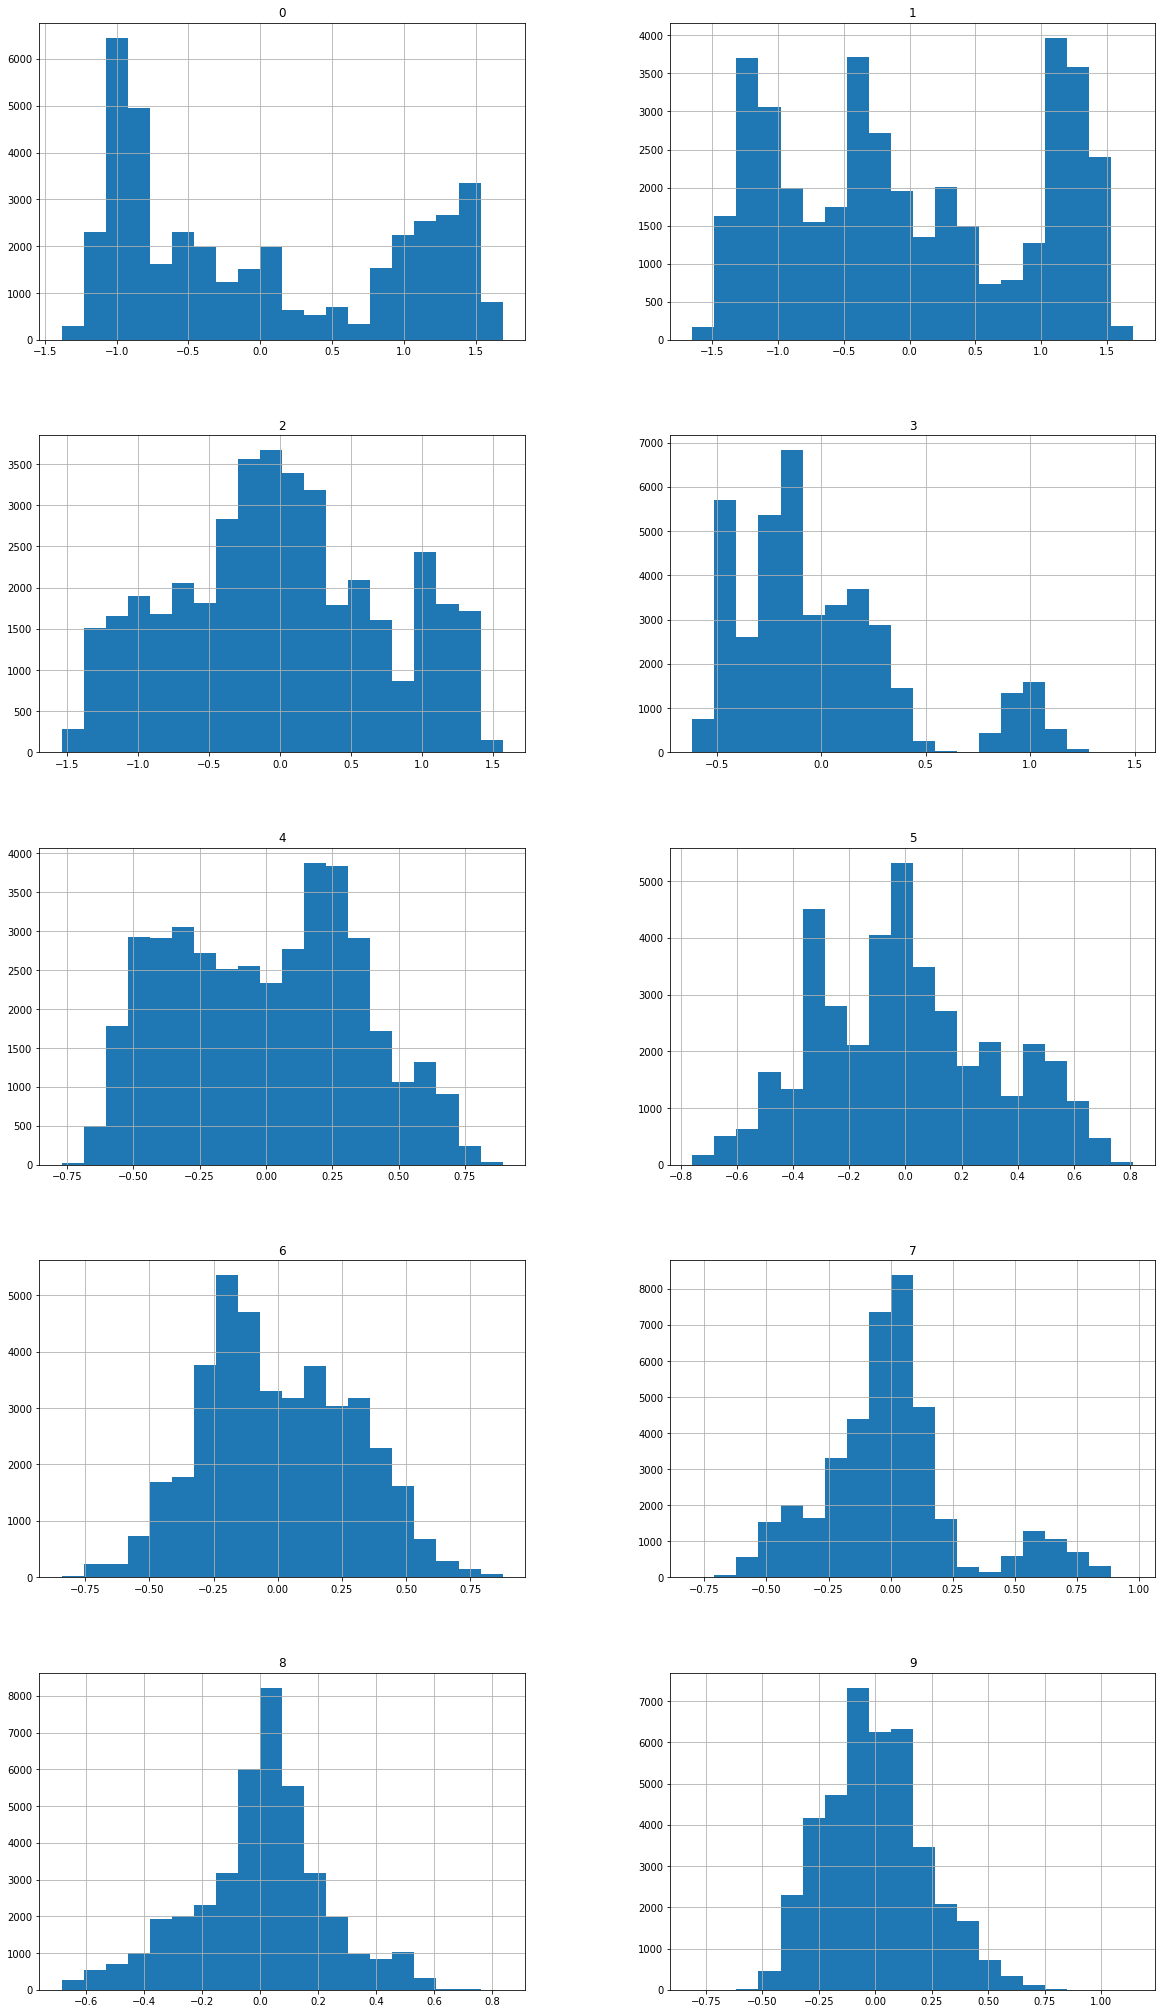

In [ ]:
pd.DataFrame(X_reduced).hist(bins=20, figsize=(20,150), layout=(20,2));

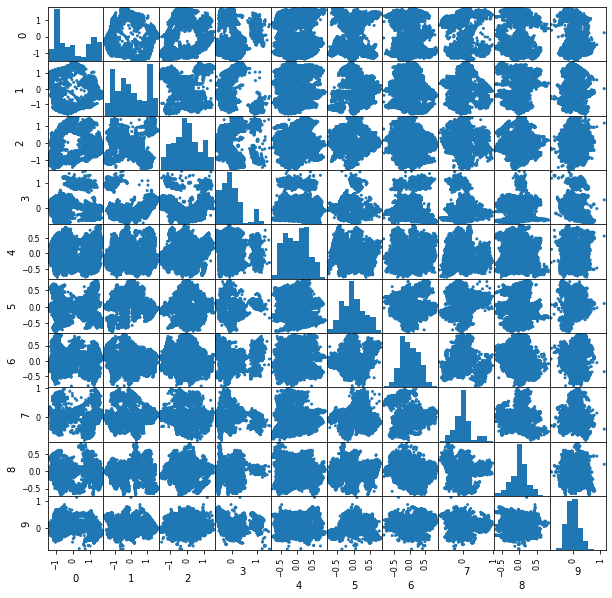

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(X_reduced), alpha=1, figsize=(10,10))
filename = "scatter_matrix_pca"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

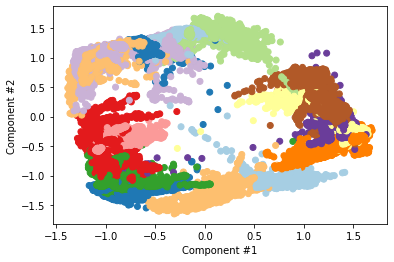

In [ ]:
mapping = {k:v for (k,v) in zip(labels, range(len(labels)))}
color = [mapping[gest] for gest in y.values]

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap='Paired')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.show()

## Classification

### Train and Test a classifier (using StratifiedKFold validation)

Create a function that train a classifier using Stratified K-Fold Cross Validation. This function returns a dictionary that store the following information:
* average accuracy between each iteration
* average time for train and predict the test set
* a dataframe that contains average values for each iteration

In [69]:
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import pickle as pk

classifier_comparison = {}

def create_classifier(classifier, show=False, save=False):

    skf = StratifiedKFold(n_splits=5)

    pipe = make_pipeline(PCA(n_components=0.95), classifier)

    list_df = []
    list_accuracy = []
    list_times = {}
    training_time = []
    test_time = []
    cm = []

    k = 1

    for train, val in skf.split(X, y):

        # fit and predict using pipeline
        X_tr = X.iloc[train]
        y_tr = y.iloc[train]
        X_val = X.iloc[val]
        y_val = y.iloc[val]

        #train model
        start_time = time.time()
        pipe.fit(X_tr,y_tr)
        training_time.append(time.time() - start_time)

        #test model
        start_time = time.time()
        y_pred = pipe.predict(X_val)
        test_time.append(time.time() - start_time)

        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True)
        cm = confusion_matrix(y_val, y_pred)

        if show:
            print(f'FOLD {k}')
            print(classification_report(y_val,y_pred))
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        if show:
            display(df)
        list_df.append(df)
        k+=1

    elapsed_time = {}
    elapsed_time['train'] = np.mean(np.array(training_time))
    elapsed_time['test'] = np.mean(np.array(test_time))


    # compute average per-class metrics
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)

    if save:
      pk.dump(model, open('model/pipeline.sav', 'wb'))

    return {'accuracy_avg': accuracy_avg, 'accuracies': list_accuracy, 'df_avg': df_avg, 'time_elapsed': elapsed_time, 'confusion_matrix': cm}



def display_confusion_matrix(matrix, filename):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.xticks(rotation=60)
    plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
    plt.show()

### kNN Hyperparameter Selection

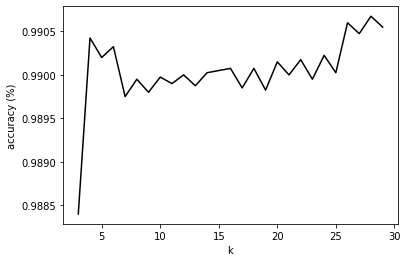

In [36]:
from sklearn.neighbors import KNeighborsClassifier

n_iterations = 10
range_k = range(3,30)
knn_comparison = {}
for k in range_k:
    model = KNeighborsClassifier(n_neighbors=k)
    knn_comparison[k] = create_classifier(model)

plt.plot(range_k, [knn_comparison[x]['accuracy_avg'] for x in range_k], color="k")  
plt.xlabel('k')
plt.ylabel('accuracy (%)')

filename = "comparison_kNN_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

### Random Forest Hyperparameter Selection

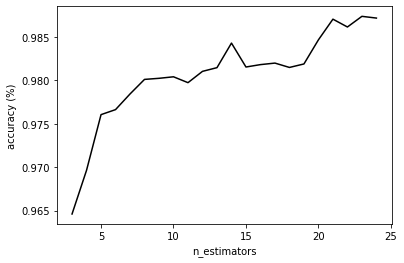

In [22]:
from sklearn.ensemble import RandomForestClassifier

range_k = range(3, 25)
rf_comparison = {}
for k in range_k:
    model = RandomForestClassifier(n_estimators=k, random_state=0)
    rf_comparison[k] = create_classifier(model)

plt.plot(range_k, [rf_comparison[x]['accuracy_avg'] for x in range_k], color="k")  
plt.xlabel('n_estimators')
plt.ylabel('accuracy (%)')

filename = "comparison_RF_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

#### Wilcoxon Test

In [61]:
import scipy.stats as stats
from scipy.stats import wilcoxon


accuracies = [rf_comparison[c]['accuracies'] for c in rf_comparison]

for i, acc in zip(range(3, len(rf_comparison)+3), accuracies):
  print(i, i-3, acc, np.mean(acc))

# tra 10 e 14
print(wilcoxon(accuracies[7], accuracies[11]))
# tra 10 e 21
print(wilcoxon(accuracies[7], accuracies[18]))
# tra 14 e 21
print(wilcoxon(accuracies[11], accuracies[18]))

3 0 [0.983875, 0.9815, 0.954125, 0.973625, 0.93] 0.9646250000000001
4 1 [0.98525, 0.981125, 0.955875, 0.97175, 0.95425] 0.96965
5 2 [0.98675, 0.98275, 0.969375, 0.974, 0.967375] 0.9760499999999999
6 3 [0.987, 0.985625, 0.97, 0.974125, 0.966375] 0.976625
7 4 [0.993875, 0.98525, 0.96875, 0.973875, 0.970375] 0.978425
8 5 [0.99425, 0.9845, 0.972875, 0.974125, 0.97475] 0.9801
9 6 [0.99425, 0.985, 0.973625, 0.973875, 0.974375] 0.9802249999999999
10 7 [0.993375, 0.9865, 0.971875, 0.974125, 0.976125] 0.9804
11 8 [0.99075, 0.985375, 0.97025, 0.97425, 0.978] 0.979725
12 9 [0.994, 0.9855, 0.971875, 0.974125, 0.979625] 0.981025
13 10 [0.99425, 0.98575, 0.9715, 0.97625, 0.9795] 0.98145
14 11 [0.994875, 0.98525, 0.972, 0.9895, 0.97975] 0.9842749999999999
15 12 [0.99475, 0.984625, 0.972, 0.976375, 0.979875] 0.9815250000000001
16 13 [0.995375, 0.98425, 0.9725, 0.9765, 0.980375] 0.9818000000000001
17 14 [0.995625, 0.9845, 0.972875, 0.976375, 0.9805] 0.981975
18 15 [0.996125, 0.984625, 0.9725, 0.97425, 

### Naive Bayesian Classifier

FOLD 1
                 precision    recall  f1-score   support

      call_left       1.00      0.99      0.99       400
     call_right       0.99      1.00      0.99       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      0.94      0.97       400
      gun_right       1.00      0.99      1.00       400
     index_left       1.00      1.00      1.00       400
    index_right       0.95      1.00      0.97       400
      okay_left       1.00      0.99      0.99       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      1.00      1.00       400
    peace_right       0.95      1.00      0.97       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      0.97      0.98       400
      stop_left       0.99      1.00      0.99       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

call_left  call_right  fist_left  fist_right    gun_left  \
precision    1.000000    0.985222        1.0    0.997506    1.000000   
recall       0.987500    1.000000        1.0    1.000000    0.942500   
f1-score     0.993711    0.992556        1.0    0.998752    0.970399   
support    400.000000  400.000000      400.0  400.000000  400.000000   

            gun_right  index_left  index_right   okay_left  okay_right  ...  \
precision    1.000000    0.997506     0.947743    1.000000         1.0  ...   
recall       0.992500    1.000000     0.997500    0.987500         1.0  ...   
f1-score     0.996236    0.998752     0.971985    0.993711         1.0  ...   
support    400.000000  400.000000   400.000000  400.000000       400.0  ...   

            rock_left  rock_right   stop_left  stop_right  thumbDown_left  \
precision    1.000000    1.000000    0.987654         1.0             1.0   
recall       0.997500    0.967500    1.000000         1.0             1.0   
f1-score     0.998748    0.983482    0.993789         1.0             1.0   
support    400.000000  400.000000  400.000000       400.0           400.0   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision              1.0      0.989924       1.000000     0.992559   
recall                 1.0      0.982500       0.990000     0.992250   
f1-score               1.0      0.986198       0.994975     0.992267   
support              400.0    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.992559  
recall         0.992250  
f1-score       0.992267  
support     8000.000000  

[4 rows x 22 columns]

FOLD 2
                 precision    recall  f1-score   support

      call_left       1.00      1.00      1.00       400
     call_right       0.99      1.00      0.99       400
      fist_left       1.00      1.00      1.00       400
     fist_right       0.99      1.00      1.00       400
       gun_left       1.00      1.00      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      0.91      0.95       400
    index_right       0.99      0.99      0.99       400
      okay_left       1.00      1.00      1.00       400
     okay_right       0.84      0.99      0.91       400
     peace_left       0.92      1.00      0.96       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       0.99      0.82      0.90       400
 thumbDown_left       1

call_left  call_right  fist_left  fist_right    gun_left  \
precision     0.9975    0.987654        1.0    0.992556    1.000000   
recall        0.9975    1.000000        1.0    1.000000    0.997500   
f1-score      0.9975    0.993789        1.0    0.996264    0.998748   
support     400.0000  400.000000      400.0  400.000000  400.000000   

            gun_right  index_left  index_right  okay_left  okay_right  ...  \
precision    1.000000    1.000000     0.994975        1.0    0.844681  ...   
recall       0.997500    0.907500     0.990000        1.0    0.992500  ...   
f1-score     0.998748    0.951507     0.992481        1.0    0.912644  ...   
support    400.000000  400.000000   400.000000      400.0  400.000000  ...   

           rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision        1.0         1.0        1.0    0.990909             1.0   
recall           1.0         1.0        1.0    0.817500             1.0   
f1-score         1.0         1.0        1.0    0.895890             1.0   
support        400.0       400.0      400.0  400.000000           400.0   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision         1.000000      0.997506       1.000000     0.985807   
recall            0.997500      1.000000       0.985000     0.984125   
f1-score          0.998748      0.998752       0.992443     0.984041   
support         400.000000    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.985807  
recall         0.984125  
f1-score       0.984041  
support     8000.000000  

[4 rows x 22 columns]

FOLD 3
                 precision    recall  f1-score   support

      call_left       0.99      1.00      0.99       400
     call_right       1.00      0.99      0.99       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      1.00      1.00       400
    index_right       1.00      1.00      1.00       400
      okay_left       1.00      1.00      1.00       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      1.00      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

call_left  call_right  fist_left  fist_right    gun_left  \
precision    0.987654    0.997481     0.9975    0.997506    1.000000   
recall       1.000000    0.990000     0.9975    1.000000    0.995000   
f1-score     0.993789    0.993726     0.9975    0.998752    0.997494   
support    400.000000  400.000000   400.0000  400.000000  400.000000   

            gun_right  index_left  index_right  okay_left  okay_right  ...  \
precision    1.000000    1.000000     0.997506        1.0         1.0  ...   
recall       0.997500    0.997500     1.000000        1.0         1.0  ...   
f1-score     0.998748    0.998748     0.998752        1.0         1.0  ...   
support    400.000000  400.000000   400.000000      400.0       400.0  ...   

           rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision        1.0         1.0        1.0         1.0        1.000000   
recall           1.0         1.0        1.0         1.0        0.997500   
f1-score         1.0         1.0        1.0         1.0        0.998748   
support        400.0       400.0      400.0       400.0      400.000000   

           thumbDown_right  thumbUp_left  thumbUp_right   macro avg  \
precision              1.0      0.994962       0.990074     0.99801   
recall                 1.0      0.987500       0.997500     0.99800   
f1-score               1.0      0.991217       0.993773     0.99800   
support              400.0    400.000000     400.000000  8000.00000   

           weighted avg  
precision       0.99801  
recall          0.99800  
f1-score        0.99800  
support      8000.00000  

[4 rows x 22 columns]

FOLD 4
                 precision    recall  f1-score   support

      call_left       1.00      0.99      0.99       400
     call_right       1.00      1.00      1.00       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      1.00      1.00       400
    index_right       1.00      1.00      1.00       400
      okay_left       1.00      1.00      1.00       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      0.99      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

call_left  call_right  fist_left  fist_right    gun_left  \
precision    1.000000         1.0        1.0         1.0    1.000000   
recall       0.990000         1.0        1.0         1.0    0.995000   
f1-score     0.994975         1.0        1.0         1.0    0.997494   
support    400.000000       400.0      400.0       400.0  400.000000   

            gun_right  index_left  index_right  okay_left  okay_right  ...  \
precision    1.000000    0.997506     0.995025        1.0         1.0  ...   
recall       0.997500    1.000000     1.000000        1.0         1.0  ...   
f1-score     0.998748    0.998752     0.997506        1.0         1.0  ...   
support    400.000000  400.000000   400.000000      400.0       400.0  ...   

           rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision        1.0         1.0        1.0         1.0             1.0   
recall           1.0         1.0        1.0         1.0             1.0   
f1-score         1.0         1.0        1.0         1.0             1.0   
support        400.0       400.0      400.0       400.0           400.0   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision              1.0      0.987654            1.0     0.998885   
recall                 1.0      1.000000            1.0     0.998875   
f1-score               1.0      0.993789            1.0     0.998875   
support              400.0    400.000000          400.0  8000.000000   

           weighted avg  
precision      0.998885  
recall         0.998875  
f1-score       0.998875  
support     8000.000000  

[4 rows x 22 columns]

FOLD 5
                 precision    recall  f1-score   support

      call_left       1.00      0.99      0.99       400
     call_right       0.96      0.96      0.96       400
      fist_left       0.96      0.96      0.96       400
     fist_right       0.95      1.00      0.97       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      0.99      1.00       400
     index_left       0.93      0.99      0.96       400
    index_right       0.99      0.88      0.93       400
      okay_left       0.96      0.99      0.98       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      0.99      0.99       400
    peace_right       0.91      1.00      0.95       400
      rock_left       1.00      0.87      0.93       400
     rock_right       1.00      0.99      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       0

call_left  call_right   fist_left  fist_right    gun_left  \
precision    1.000000    0.955224    0.955224    0.952267    1.000000   
recall       0.987500    0.960000    0.960000    0.997500    0.995000   
f1-score     0.993711    0.957606    0.957606    0.974359    0.997494   
support    400.000000  400.000000  400.000000  400.000000  400.000000   

            gun_right  index_left  index_right   okay_left  okay_right  ...  \
precision    1.000000    0.931925     0.994318    0.956731         1.0  ...   
recall       0.995000    0.992500     0.875000    0.995000         1.0  ...   
f1-score     0.997494    0.961259     0.930851    0.975490         1.0  ...   
support    400.000000  400.000000   400.000000  400.000000       400.0  ...   

            rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision    1.000000    1.000000        1.0         1.0        0.987654   
recall       0.872500    0.992500        1.0         1.0        1.000000   
f1-score     0.931909    0.996236        1.0         1.0        0.993789   
support    400.000000  400.000000      400.0       400.0      400.000000   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision         1.000000      0.982801       0.957816     0.979256   
recall            0.992500      1.000000       0.965000     0.978375   
f1-score          0.996236      0.991326       0.961395     0.978199   
support         400.000000    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.979256  
recall         0.978375  
f1-score       0.978199  
support     8000.000000  

[4 rows x 22 columns]

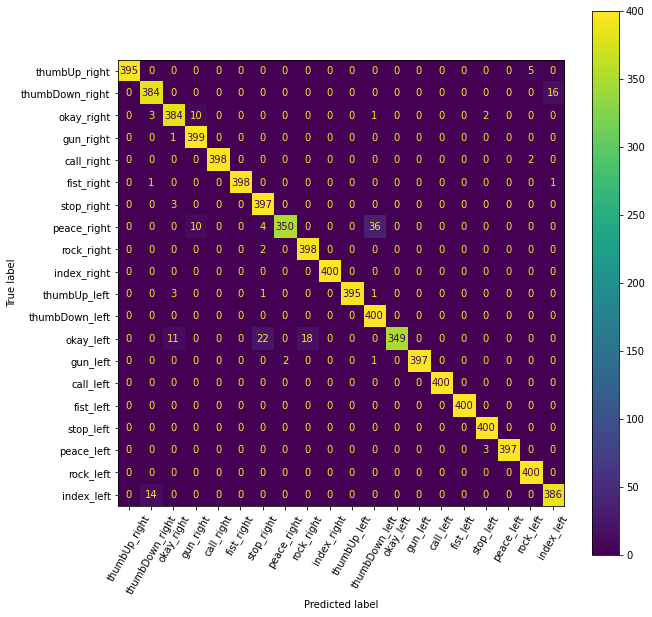

In [70]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
classifier_comparison[str(model)] = create_classifier(model, show=True, save=True)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Decision Tree Classifier

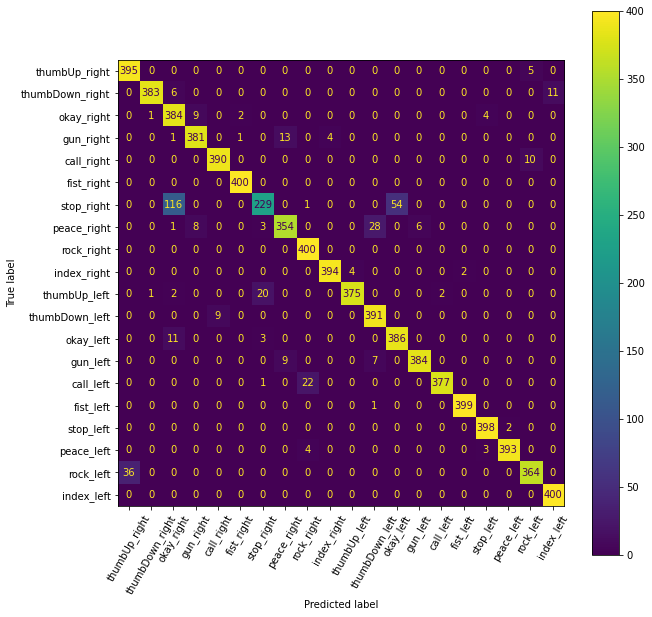

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Random Forest Classifier

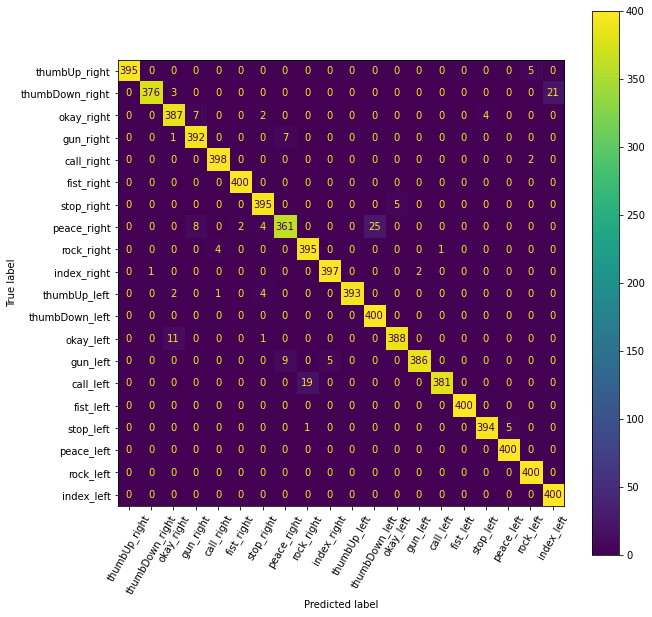

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=14, random_state=0)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### K-NN Classifier

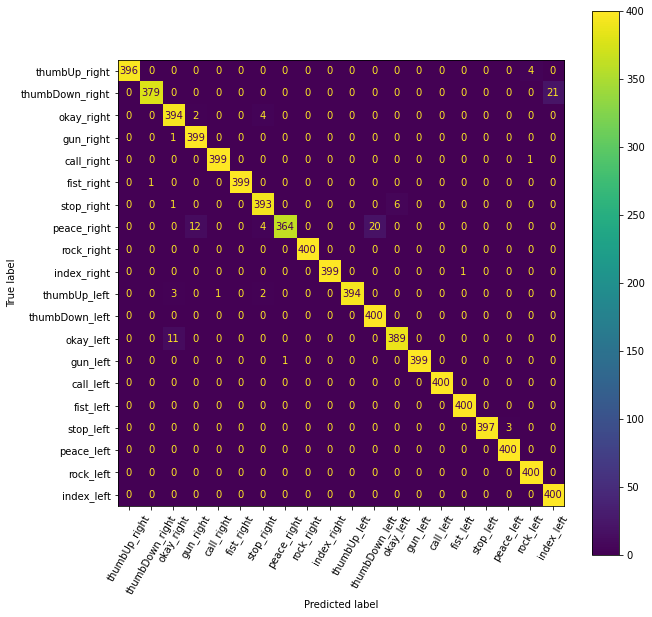

In [52]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Support Vector Classifier

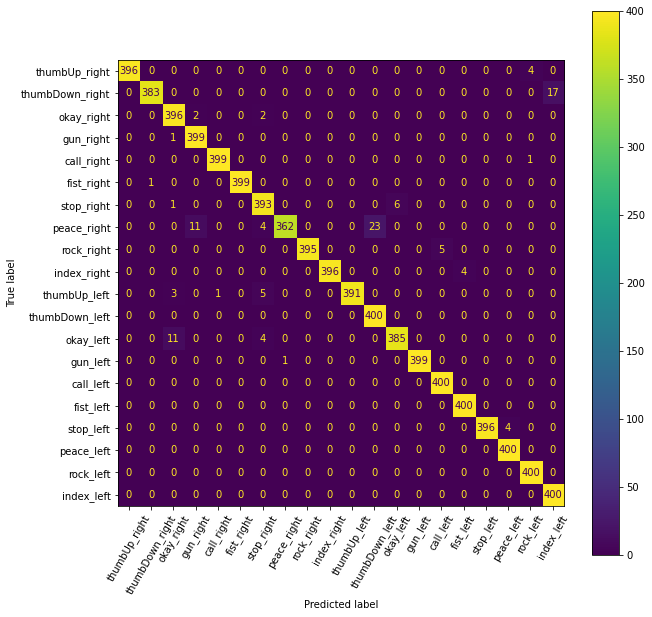

In [53]:
from sklearn.svm import SVC

model = SVC()
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

## Comparison between Models

In [64]:
for c, val in zip(classifier_comparison.keys(), classifier_comparison):
  print(c, classifier_comparison[val]['accuracy_avg'],  classifier_comparison[val]['df_avg']['weighted avg']['precision'],  classifier_comparison[val]['df_avg']['weighted avg']['recall'], classifier_comparison[val]['df_avg']['weighted avg']['f1-score'])

GaussianNB() 0.990325 0.9909032549626404 0.990325 0.9902765732859447
DecisionTreeClassifier(random_state=0) 0.9580500000000001 0.964639997559577 0.9580500000000001 0.9566437069013652
RandomForestClassifier(n_estimators=14, random_state=0) 0.9842749999999999 0.9862985835816742 0.984275 0.9840104595164638
KNeighborsClassifier(n_neighbors=4) 0.9904250000000001 0.9910855462147797 0.9904249999999999 0.9903725846104724
SVC() 0.993675 0.9939531736824682 0.993675 0.993658175705133


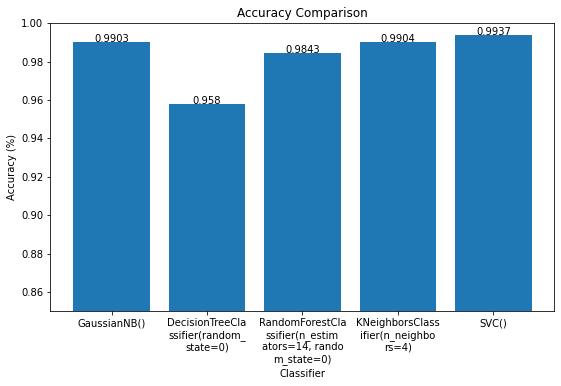

In [67]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

avg_accuracies = [classifier_comparison[x]['accuracy_avg'] for x in classifier_comparison]
ax.bar(classifier_comparison.keys(), avg_accuracies)

plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")

for i in range(len(classifier_comparison.keys())):
    plt.text(i,avg_accuracies[i], round(avg_accuracies[i],4), ha= 'center')

plt.title('Accuracy Comparison')
#plt.grid()
plt.ylim([0.85, 1])

xticks = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in classifier_comparison.keys()]
plt.xticks(range(len(xticks)), xticks)
filename = "comparison_accuracy_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

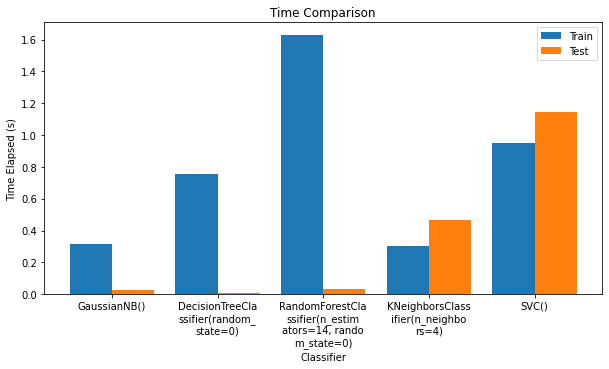

In [66]:
trains = [classifier_comparison[x]['time_elapsed']['train'] for x in classifier_comparison]
tests = [classifier_comparison[x]['time_elapsed']['test'] for x in classifier_comparison]
  
X_axis = np.arange(len(classifier_comparison))

plt.figure(figsize=(10,5)) 

plt.bar(X_axis - 0.2, trains, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, tests, 0.4, label = 'Test')
  
xticks = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in classifier_comparison.keys()]
plt.xticks(range(len(xticks)), xticks)

plt.xlabel("Classifier")
plt.ylabel("Time Elapsed (s)")
plt.title('Time Comparison')
plt.legend()
filename = "comparison_time_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()